## Deckbuilding Guide

This notebook has functions that help with building Magic the Gathering decks.

Common considerations people encounter when putting together a deck include.

1. How many lands do should I include in a deck?
2. What is the probability of having a specific card
    a. In my opening hand
    b. After a certain number of draws.
    
3. What is the likelihood of have a combo go off?


In [12]:

import math
import itertools
import numpy                     as np
import matplotlib.pyplot         as plt
import operator                  as op
from functools                   import reduce
from matplotlib.ticker           import FuncFormatter
from matplotlib.ticker           import MaxNLocator

from matplotlib.ticker           import FuncFormatter
from matplotlib.ticker           import MaxNLocator
from collections                 import namedtuple





def draw_probability(desired_cards_array
                    ,num_target_cards
                    ,num_draws
                    ,num_cards
                    ,verbose=False):
    retval = []
    for x in desired_cards_array:
        draw_combos = nCr(num_cards,num_draws)
        other_cards_combos = nCr(num_cards-num_target_cards,num_draws-x)
        desired_cards_combos = nCr(num_target_cards,x)
        if verbose:
            print('desired cards combos: {} '.format(desired_cards_combos))
            print('other combos: {} '.format(other_cards_combos))
            print('draw combos: {} '.format(draw_combos))
        retval += [desired_cards_combos*other_cards_combos/draw_combos]
    return retval



def ncr(n, r):
    #returns permutation count
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer//denom



def nCr(n,r):
    #returns number of combinations
    try:
        f = math.factorial
        return f(n) / f(r) / f(n-r)
    except:
        if r > n:
            print('You cannot choose more values than available')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        #print('height',height)
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
                ha='center', va='bottom')


#probability of drawing N target cards from a deck of N cards with N number of draws
#return probability for each target N 0 cards, 1 card, 2 cards,N... card_list

#Scenario 1
#Chance of drawing 1,2,3,4 of the same cards

#What is the chance of getting at 1,2,3,4 lands in your opening 7 cards
#When you have N number of lands [15 - 25 lands]


#Chance of drawing at least land
1 - ((40/60)*(40/59)*(40/58)*(40/57))



def at_least_one(num_target_cards,num_draws,deck_size,verbose=False):
    n = deck_size - num_target_cards
    rev_odds = 0 
    odds = 1
    for i in range(num_draws):
        #print('odds',odds)
        if verbose:
            print('draw | deck size | odds',i,deck_size,1 - odds)
            #print(i,deck_size,1 - odds)
        if n/deck_size == 1:
            return 1
            break
        odds *= n/deck_size
        deck_size -= 1
        n = deck_size - num_target_cards
    return 1 - odds

#at_least_one(60,17)

In [14]:
#Test code for at_least_one()
num_target_cards = 4
num_draws = 12
deck_size = 60


print(at_least_one(num_target_cards,num_draws,deck_size,verbose=True))


draw | deck size | odds 0 60 0
draw | deck size | odds 1 59 0.06666666666666665
draw | deck size | odds 2 58 0.12994350282485878
draw | deck size | odds 3 57 0.18994739918176506
draw | deck size | odds 4 56 0.24679319573041314
draw | deck size | odds 5 55 0.3005936817496693
draw | deck size | odds 6 54 0.3514595958042388
draw | deck size | odds 7 53 0.3994996257446656
draw | deck size | odds 8 52 0.4448204087073323
draw | deck size | odds 9 51 0.48752653111446054
draw | deck size | odds 10 50 0.5277205286741107
draw | deck size | odds 11 49 0.5655028863801819
0.600972038512412


In [10]:
for num_draws in range(1,13):
    print(num_draws, round(at_least_one(4,num_draws,60),2))
    

1 0.07
2 0.13
3 0.19
4 0.25
5 0.3
6 0.35
7 0.4
8 0.44
9 0.49
10 0.53
11 0.57
12 0.6


What is the fewest cards do you want to draw? 1
What is the most cards do you want to draw? 4
How many total cards in the deck? 60
How many copies of the desired card are in the deck? 4
How many draws will you make? 7


/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


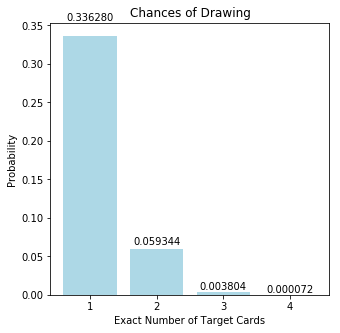

In [13]:

min_desired = 1
max_desired = 4

min_desired = int(input('What is the fewest cards do you want to draw? '))
max_desired = int(input('What is the most cards do you want to draw? '))
num_cards = int(input('How many total cards in the deck? '))
num_target_cards = int(input('How many copies of the desired card are in the deck? '))
num_draws = int(input('How many draws will you make? '))


desired_card_range = list(range(min_desired,max_desired+1))

#desired_card_range = [int(x) for x in range(min_desired,max_desired+1)]


#plt.bar(desired_card_range,draw_probability(desired_card_range,num_target_cards=4,num_draws=5,num_cards=52,verbose=False))
#fig, ax = plt.subplots()
x = desired_card_range
y = draw_probability(desired_card_range
                                           ,num_target_cards=num_target_cards
                                           ,num_draws=num_draws
                                           ,num_cards=num_cards)



fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
rect1 = ax.bar(x,y,color='lightblue',linewidth=3)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
autolabel(rect1)
ax.set_ylim=(0,1)

ax.set(title='Chances of Drawing'
       ,xlabel='Exact Number of Target Cards'
      , ylabel='Probability')

fig.show()
